# Data quality analysis

In [33]:
# This analyzes the used_cars.csv dataset by summarizing key statistics for each column.
# It calculates:Total number of rows, number of non-null and null values, count of zero values (for numeric columns),data type of each column
import pandas as pd
data = pd.read_csv("used_cars.csv") #read datast
summary = []
for column in data.columns:
    total_rows = data.shape[0]
    non_null_values = data[column].notnull().sum()
    zero_values = (data[column] == 0).sum() if pd.api.types.is_numeric_dtype(data[column]) else "N/A"  # "N/A if rows aren't numeric"
    null_values = data[column].isnull().sum()
    data_type = data[column].dtype
    summary.append({
        "Column Name": column,
        "Total Rows": total_rows,
        "Rows filled with 0": zero_values,
        "Null Rows": null_values,
        "Data Type": data_type
    })
summary_df = pd.DataFrame(summary)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(summary_df)

,Column Name,Total Rows,Rows filled with 0,Null Rows,Data Type
0,id,2799540,N/A,0,object
1,vin,2799540,N/A,0,object
2,price,2799540,308588,0,int64
3,msrp,2799540,301683,0,int64
4,miles,2799540,69413,0,int64
5,neo_year,2799540,0,0,int64
6,neo_make,2799540,N/A,0,object
7,neo_model,2799540,N/A,331,object
8,neo_engine_size,2799540,0,75017,float64
9,dealer_id,2799540,0,0,int64


In [34]:
data.head(5)

,id,vin,price,msrp,miles,neo_year,neo_make,neo_model,neo_engine_size,dealer_id,state,carfax_1_owner,carfax_clean_title,dos_active
0,99e10b1f-6294,1B7FL26X31S186656,0,0,103354,2001,Dodge,Dakota,3.9,10013429,OK,False,False,7
1,3f57f61d-1869,1C4HJWDG5EL134549,0,0,127523,2014,Jeep,Wrangler Unlimited,3.6,11012301,TX,False,False,115
2,112e9a13-cfb9,1C4PJMCS4FW667305,8995,8995,136335,2015,Jeep,Cherokee,3.2,1060077,MI,False,False,19
3,354e92c8-8275,1C4SDHCT5GC394363,0,0,113674,2016,Dodge,Durango,5.7,1055791,AZ,False,False,25
4,01d760da-0f47,1C6RR7XT7ES323583,0,0,72442,2014,RAM,1500,NaN,11000703,NC,False,False,7


Correlation of numerical values


,price,msrp,miles,neo_year,neo_engine_size,dealer_id,dos_active
price,1.000000,0.990247,-0.377237,0.358304,0.226436,-0.094770,-0.058577
msrp,0.990247,1.000000,-0.377506,0.358478,0.223054,-0.096596,-0.053901
miles,-0.377237,-0.377506,1.000000,-0.629460,0.168914,0.160306,0.098455
neo_year,0.358304,0.358478,-0.629460,1.000000,-0.167538,-0.183012,-0.226264
neo_engine_size,0.226436,0.223054,0.168914,-0.167538,1.000000,0.024341,0.044442
dealer_id,-0.094770,-0.096596,0.160306,-0.183012,0.024341,1.000000,0.094129
dos_active,-0.058577,-0.053901,0.098455,-0.226264,0.044442,0.094129,1.000000


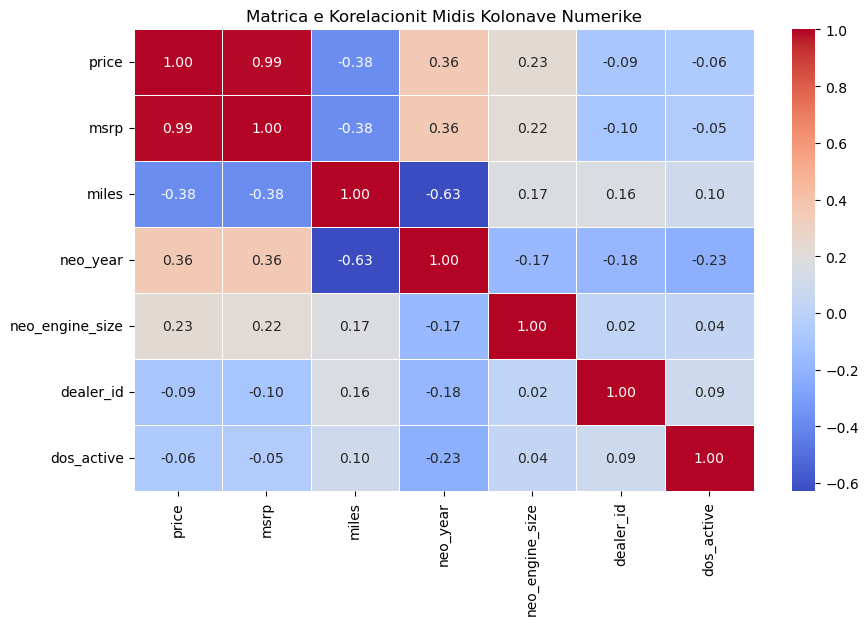

In [38]:
#This script calculates and visualizes the correlation matrix of numerical columns in a dataset.
#The correlation matrix shows how numerical values are related to each other.
#The heatmap uses colors to show these relationships, red means strong positive, blue means strong negative
#and lighter colors mean weak or no relationship.
import seaborn as sns
numeric_data = data.select_dtypes(include=[np.number]) #filter only numeric values
correlation_matrix = numeric_data.corr() #calculate correlation matrix
print("Correlation of numerical values")
display(correlation_matrix)
#heatmap visualiztion
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrica e Korelacionit Midis Kolonave Numerike")
plt.show()

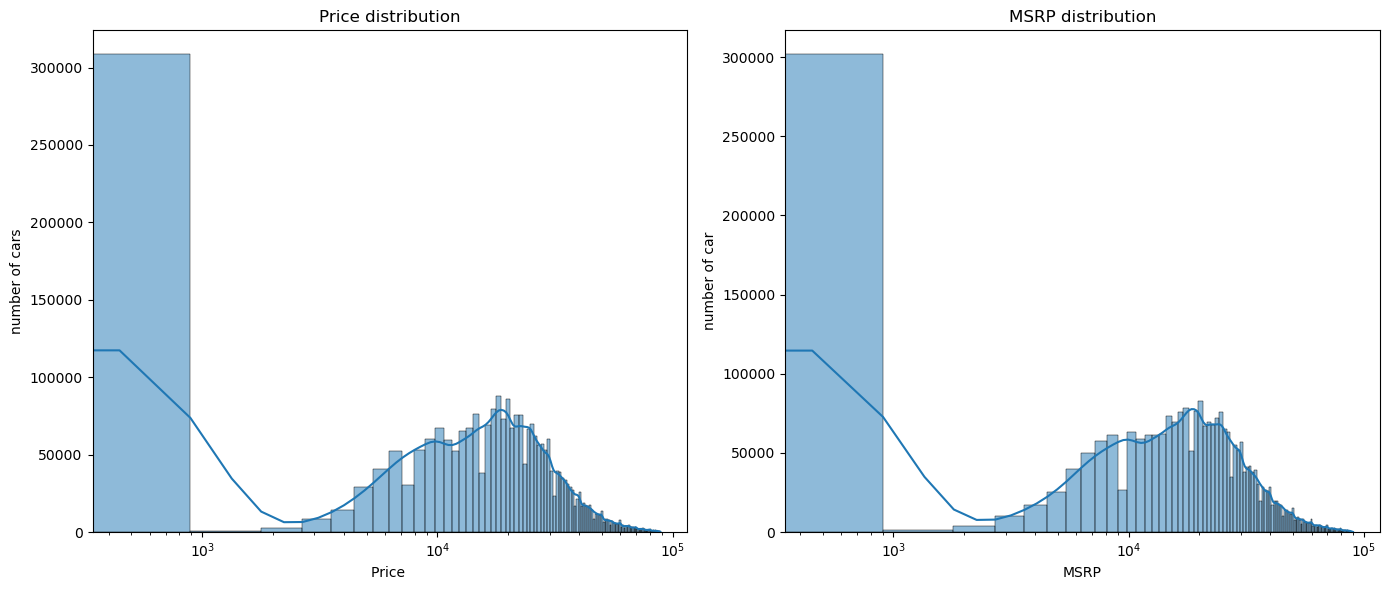

In [42]:
#Visualizes Price and MSRP distributions. It uses logarithmic scaling in histograms for better clarity and comparison.
#The analysis shows that most used cars are priced at the lower end, while a few high-value vehicles 
#create a long tail in the distribution. 
#This suggests a market dominated by affordable cars, with fewer premium-priced models.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
file_path = "used_cars.csv"
data = pd.read_csv(file_path)
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
#filter necessary columns
price_column = "price"
msrp_column = "msrp"
low_price, high_price = data[price_column].quantile([0.01, 0.99])
low_msrp, high_msrp = data[msrp_column].quantile([0.01, 0.99])
filtered_data = data[(data[price_column] >= low_price) & (data[price_column] <= high_price)]
filtered_data = filtered_data[(filtered_data[msrp_column] >= low_msrp) & (filtered_data[msrp_column] <= high_msrp)]
plt.figure(figsize=(14, 6))
# Histogram for price
plt.subplot(1, 2, 1)
sns.histplot(filtered_data[price_column].dropna(), bins=100, kde=True)
plt.xscale("log")  #use the logarithmic scale to clarify the distribution.
plt.title("Price distribution")
plt.xlabel("Price ")
plt.ylabel("number of cars")
# Histogram for msrp
plt.subplot(1, 2, 2)
sns.histplot(filtered_data[msrp_column].dropna(), bins=100, kde=True)
plt.xscale("log") #Logarithmic scale
plt.title("MSRP distribution")
plt.xlabel("MSRP")
plt.ylabel("number of car")
plt.tight_layout()
plt.show()

In [43]:
#  displays statistics for the price, msrp, and miles columns
stats = data[['price', 'msrp', 'miles']].describe().applymap(lambda x: f"{x:,.0f}")
print(stats)

           price       msrp      miles
count  2,799,540  2,799,540  2,799,540
mean      23,310     23,816     71,822
std       24,059     24,520     55,804
min            0          0          0
25%       10,995     11,200     28,565
50%       19,998     20,500     61,269
75%       29,998     30,975    105,000
max    1,599,998  1,599,998  2,471,710


In [42]:
#unique values
for col in ['id','vin', 'neo_year', 'neo_make', 'neo_model', 'state', 'dos_active']:
    print(f"{col}: {data[col].nunique()} vlera unike")

id: 2799540 vlera unike
vin: 2799540 vlera unike
neo_year: 45 vlera unike
neo_make: 72 vlera unike
neo_model: 1551 vlera unike
state: 58 vlera unike
dos_active: 2383 vlera unike


In [48]:
#check for duplicate values
duplicates = data.duplicated().sum()
print(f"Duplicated: {duplicates}")
#check if price <= msrp
invalid_prices = data[data['price'] > data['msrp']]
print(f"Rows with price > msrp: {len(invalid_prices)}")

Duplicated: 0
Rows with price > msrp: 17030


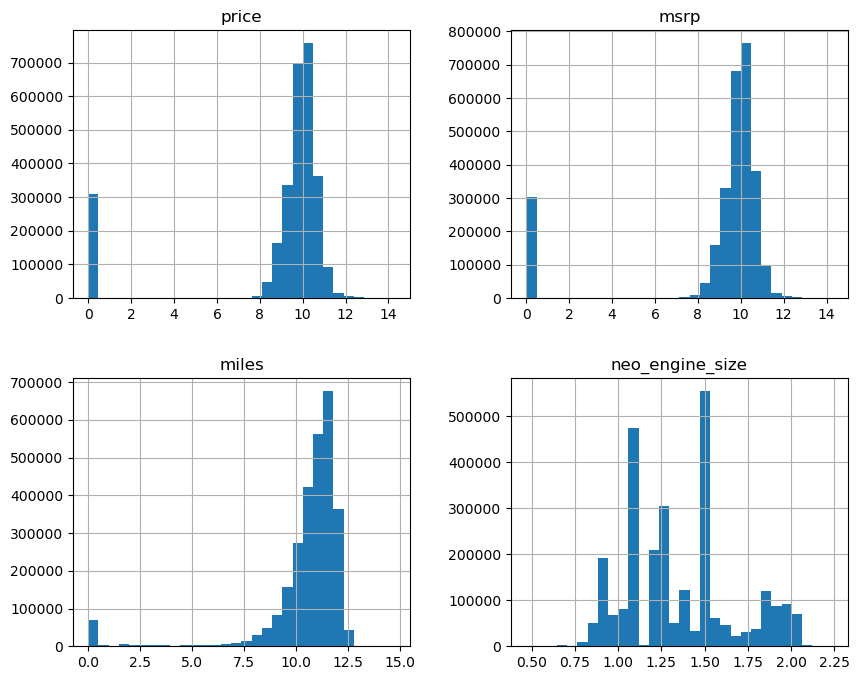

In [47]:
import numpy as np
# Histograma me shkallë logaritmike
data[['price', 'msrp', 'miles','neo_engine_size']].apply(np.log1p).hist(bins=30, figsize=(10, 8))
plt.show()
#Most cars have a mid-range price, but a few have very low or very high prices.
#The distribution of MSRP is similar to the actual selling price, but some cars have a much higher MSRP.
#Most cars have moderate mileage, but some have extremely low or high mileage.
#Certain engine sizes appear frequently, suggesting they are more common in the market.

In [4]:
data = pd.read_csv ('used_cars_updated.csv')
data.head()

,id,vin,price,msrp,miles,neo_year,neo_make,neo_model,neo_engine_size,dealer_id,...,price_vs_msrp,price_to_engine_size,price_depreciation_per_mile,rank_price,rank_miles,mean_state_price,price_difference_from_state,min_price_in_group,max_price_in_group,price_vs_days_on_market
0,99e10b1f-6294,1B7FL26X31S186656,0,0,103354,2001,Dodge,Dakota,3.9,10013429,...,NaN,0.0000,0.0,2.0,4.0,21581.501394,-21581.501394,0.0,9900.0,0.000000
1,3f57f61d-1869,1C4HJWDG5EL134549,0,0,127523,2014,Jeep,Wrangler Unlimited,3.6,11012301,...,NaN,0.0000,0.0,88.0,1362.0,23189.688084,-23189.688084,0.0,828880.0,0.000000
2,112e9a13-cfb9,1C4PJMCS4FW667305,8995,8995,136335,2015,Jeep,Cherokee,3.2,1060077,...,0.0,2810.9375,0.0,325.5,808.0,21124.831655,-12129.831655,0.0,121300.0,473.421053
3,354e92c8-8275,1C4SDHCT5GC394363,0,0,113674,2016,Dodge,Durango,5.7,1055791,...,NaN,0.0000,0.0,5.0,48.0,24915.488626,-24915.488626,0.0,34518.0,0.000000
4,01d760da-0f47,1C6RR7XT7ES323583,0,0,72442,2014,RAM,1500,NaN,11000703,...,NaN,NaN,0.0,NaN,NaN,23751.499942,-23751.499942,NaN,NaN,0.000000


# ML_Model K_Means

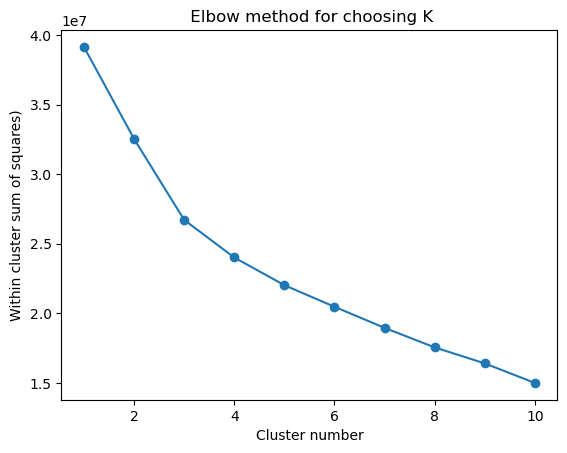

deal_category
Great Deal    1242488
Good Deal     1131549
Fair Deal      381804
Uncertain       30618
No Rating        9023
Name: count, dtype: int64


In [45]:
#The script applies K-Means clustering to categorize used cars based on feature like price, mileage, engine size
#and price related metrics. 
#Determines optimal cluster count using the elbow method and assigns each car to a category such fair deal, great deal etc. 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
file_path = 'used_cars_updated.csv'
df = pd.read_csv(file_path)

df.fillna({
    'price': 0,
    'msrp': 0,
    'miles': df['miles'].median(),
    'neo_engine_size': df['neo_engine_size'].median(),
    'mean_price': df['mean_price'].median(),
    'std_price': df['std_price'].median(),
    'median_price': df['median_price'].median(),
    'q1_price': df['q1_price'].median(),
    'q3_price': df['q3_price'].median(),
    'IQR_price': df['IQR_price'].median(),
    'price_to_engine_size': df['price_to_engine_size'].median(),
    'price_depreciation_per_mile': df['price_depreciation_per_mile'].median(),
    'rank_price': df['rank_price'].median(),
    'mean_state_price': df['mean_state_price'].median(),
    'price_difference_from_state': df['price_difference_from_state'].median(),
    'min_price_in_group': df['min_price_in_group'].median(),
    'max_price_in_group': df['max_price_in_group'].median(),
    'dos_active': df['dos_active'].median()
}, inplace=True)
# main columns for clustering
features = ['price', 'msrp', 'miles', 'neo_engine_size', 'mean_price', 'median_price', 'std_price',
            'price_to_engine_size', 'price_depreciation_per_mile', 'rank_price', 'price_difference_from_state',
            'min_price_in_group', 'max_price_in_group', 'dos_active']
#Independent copy of X
X = df[features].copy()
X.loc[:, :] = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna().copy()
df_filtered = df.loc[X.index].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# visualization part
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Cluster number')
plt.ylabel('Within cluster sum of squares)')
plt.title(' Elbow method for choosing K')
plt.show()
# train model 
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_filtered['deal_category'] = kmeans.fit_predict(X_scaled)
# define category
deal_category_mapping = {
    0: 'No Rating',
    1: 'Fair Deal',
    2: 'Great Deal',
    3: 'Good Deal',
    4: 'Uncertain'
}
df_filtered['deal_category'] = df_filtered['deal_category'].map(deal_category_mapping)
df_filtered['deal_category'] = df_filtered['deal_category'].fillna('No Rating')
df_filtered.to_csv('used_cars_categorized_kmeans_labeled.csv', index=False)
# number of cars for each category
category_counts = df_filtered['deal_category'].value_counts()
print(category_counts)

# Decision Tree Algorithm_Prediction

In [50]:
#this script is applied to a dataset where historical car data has already been classified into deal categories using a previous 
#method K-Means. The Decision Tree model is trained on these existing classifications and vehicle attributes to learn patterns 
#from historical data. Once trained, the model is used to predict deal categories for new data or reclassify existing data, 
#generating a new version of the dataset with updated predictions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
file_path = 'used_cars_categorized_kmeans_labeled.csv'
df = pd.read_csv(file_path)
df.fillna({
    'price': 0,
    'msrp': 0,
    'miles': df['miles'].median(),
    'neo_engine_size': df['neo_engine_size'].median(),
    'mean_price': df['mean_price'].median(),
    'std_price': df['std_price'].median(),
    'median_price': df['median_price'].median(),
    'q1_price': df['q1_price'].median(),
    'q3_price': df['q3_price'].median(),
    'IQR_price': df['IQR_price'].median(),
    'price_to_engine_size': df['price_to_engine_size'].median(),
    'price_depreciation_per_mile': df['price_depreciation_per_mile'].median(),
    'rank_price': df['rank_price'].median(),
    'mean_state_price': df['mean_state_price'].median(),
    'price_difference_from_state': df['price_difference_from_state'].median(),
    'min_price_in_group': df['min_price_in_group'].median(),
    'max_price_in_group': df['max_price_in_group'].median(),
    'dos_active': df['dos_active'].median()
}, inplace=True)
features = ['price', 'msrp', 'miles', 'neo_engine_size', 'mean_price', 'median_price', 'std_price',
            'price_to_engine_size', 'price_depreciation_per_mile', 'rank_price', 'price_difference_from_state',
            'min_price_in_group', 'max_price_in_group', 'dos_active']

X = df[features].copy()
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
df_filtered = df.loc[X.index].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_filtered['deal_category'], test_size=0.2, random_state=42
)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of decision tree model/UsedCars: {accuracy:.2f}")
print("classification report")
print(classification_report(y_test, y_pred))
joblib.dump(dt_model, 'decision_tree_model.pkl')


df_filtered['deal_category_predicted'] = dt_model.predict(X_scaled)
df_filtered.to_csv('used_cars_categorized_decision_tree.csv', index=False)

Accuracy of decision tree model/UsedCars: 0.93
classification report
              precision    recall  f1-score   support

   Fair Deal       0.94      0.88      0.91     76362
   Good Deal       0.92      0.93      0.92    226437
  Great Deal       0.94      0.96      0.95    248327
   No Rating       0.97      0.89      0.93      1827
   Uncertain       0.98      0.68      0.81      6144

    accuracy                           0.93    559097
   macro avg       0.95      0.87      0.90    559097
weighted avg       0.93      0.93      0.93    559097



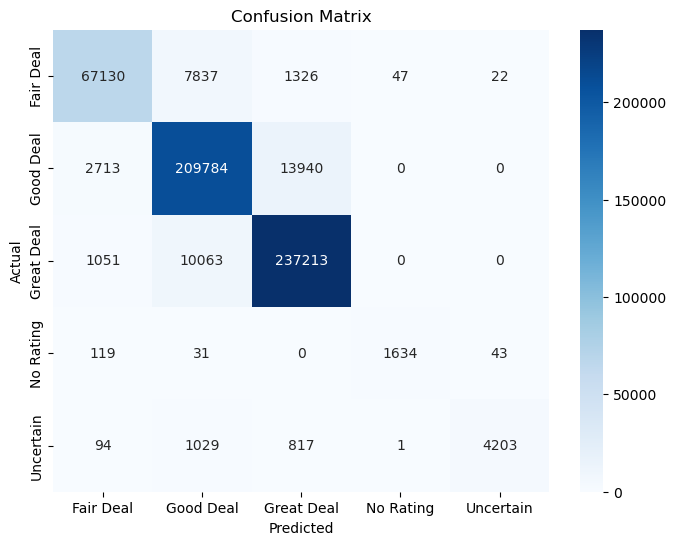

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
